 # Project objective: 

The goal of this project is to build a model that can predict the probability of heart disease occurrence, based on a combination of features that describes the disease. In order to achieve the goal, we used data sets that was collected by Cleveland Clinic Foundation in Switzerland.

Dataset Description:
The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence(values 1, 2, 3, 4) from absence (value 0). We have 303 rows of people data with 13 continuous observation of different symptoms.

Detailed Description of Dataset:https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# 1. Import Libraries:

In [1]:
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
import pickle

from IPython.display import Image


# 2. Defining the column names and reading the file:

In [2]:
col_names = ['age','gender','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv(r'C:\Users\User\Desktop\dem\processed.cleveland.data.csv', names=col_names, header=None, na_values="?")


 ### Display first 5 lines

In [3]:
df.head()

,age,gender,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Display the information about the data in the dataframe loaded

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
gender                  303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


### Describe:
Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [5]:
df.describe()

,age,gender,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# 3. Data Summarization, Analysis and Visualization:
### Differentiate the categorical and numerical columns

In [6]:
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['gender', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


### Count the number of labels with their corresponding diagnosis

In [7]:
df.diagnosis.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64

### Differentiate the data based on the severity of diagnosis:
#### if 0 then no heart disease
#### else diagonised with heart disease

In [8]:
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

### Display a bar chart and a pie chart indicating the count corresponding to the diagnosis

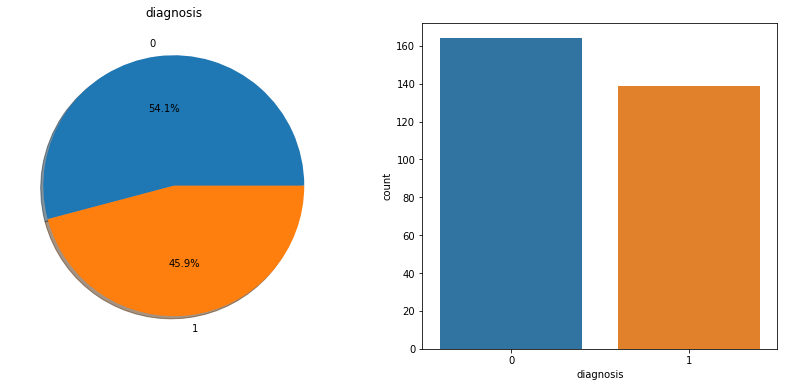

In [9]:
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

### Describe all the numeric columns in the dataframe

In [10]:
df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.693069,149.607261,54.438944,131.689769,1.039604
std,51.776918,22.875003,9.038662,17.599748,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,48.000000,120.000000,0.000000
50%,241.000000,153.000000,56.000000,130.000000,0.800000
75%,275.000000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


### Plot pairwise relationships in the dataset 

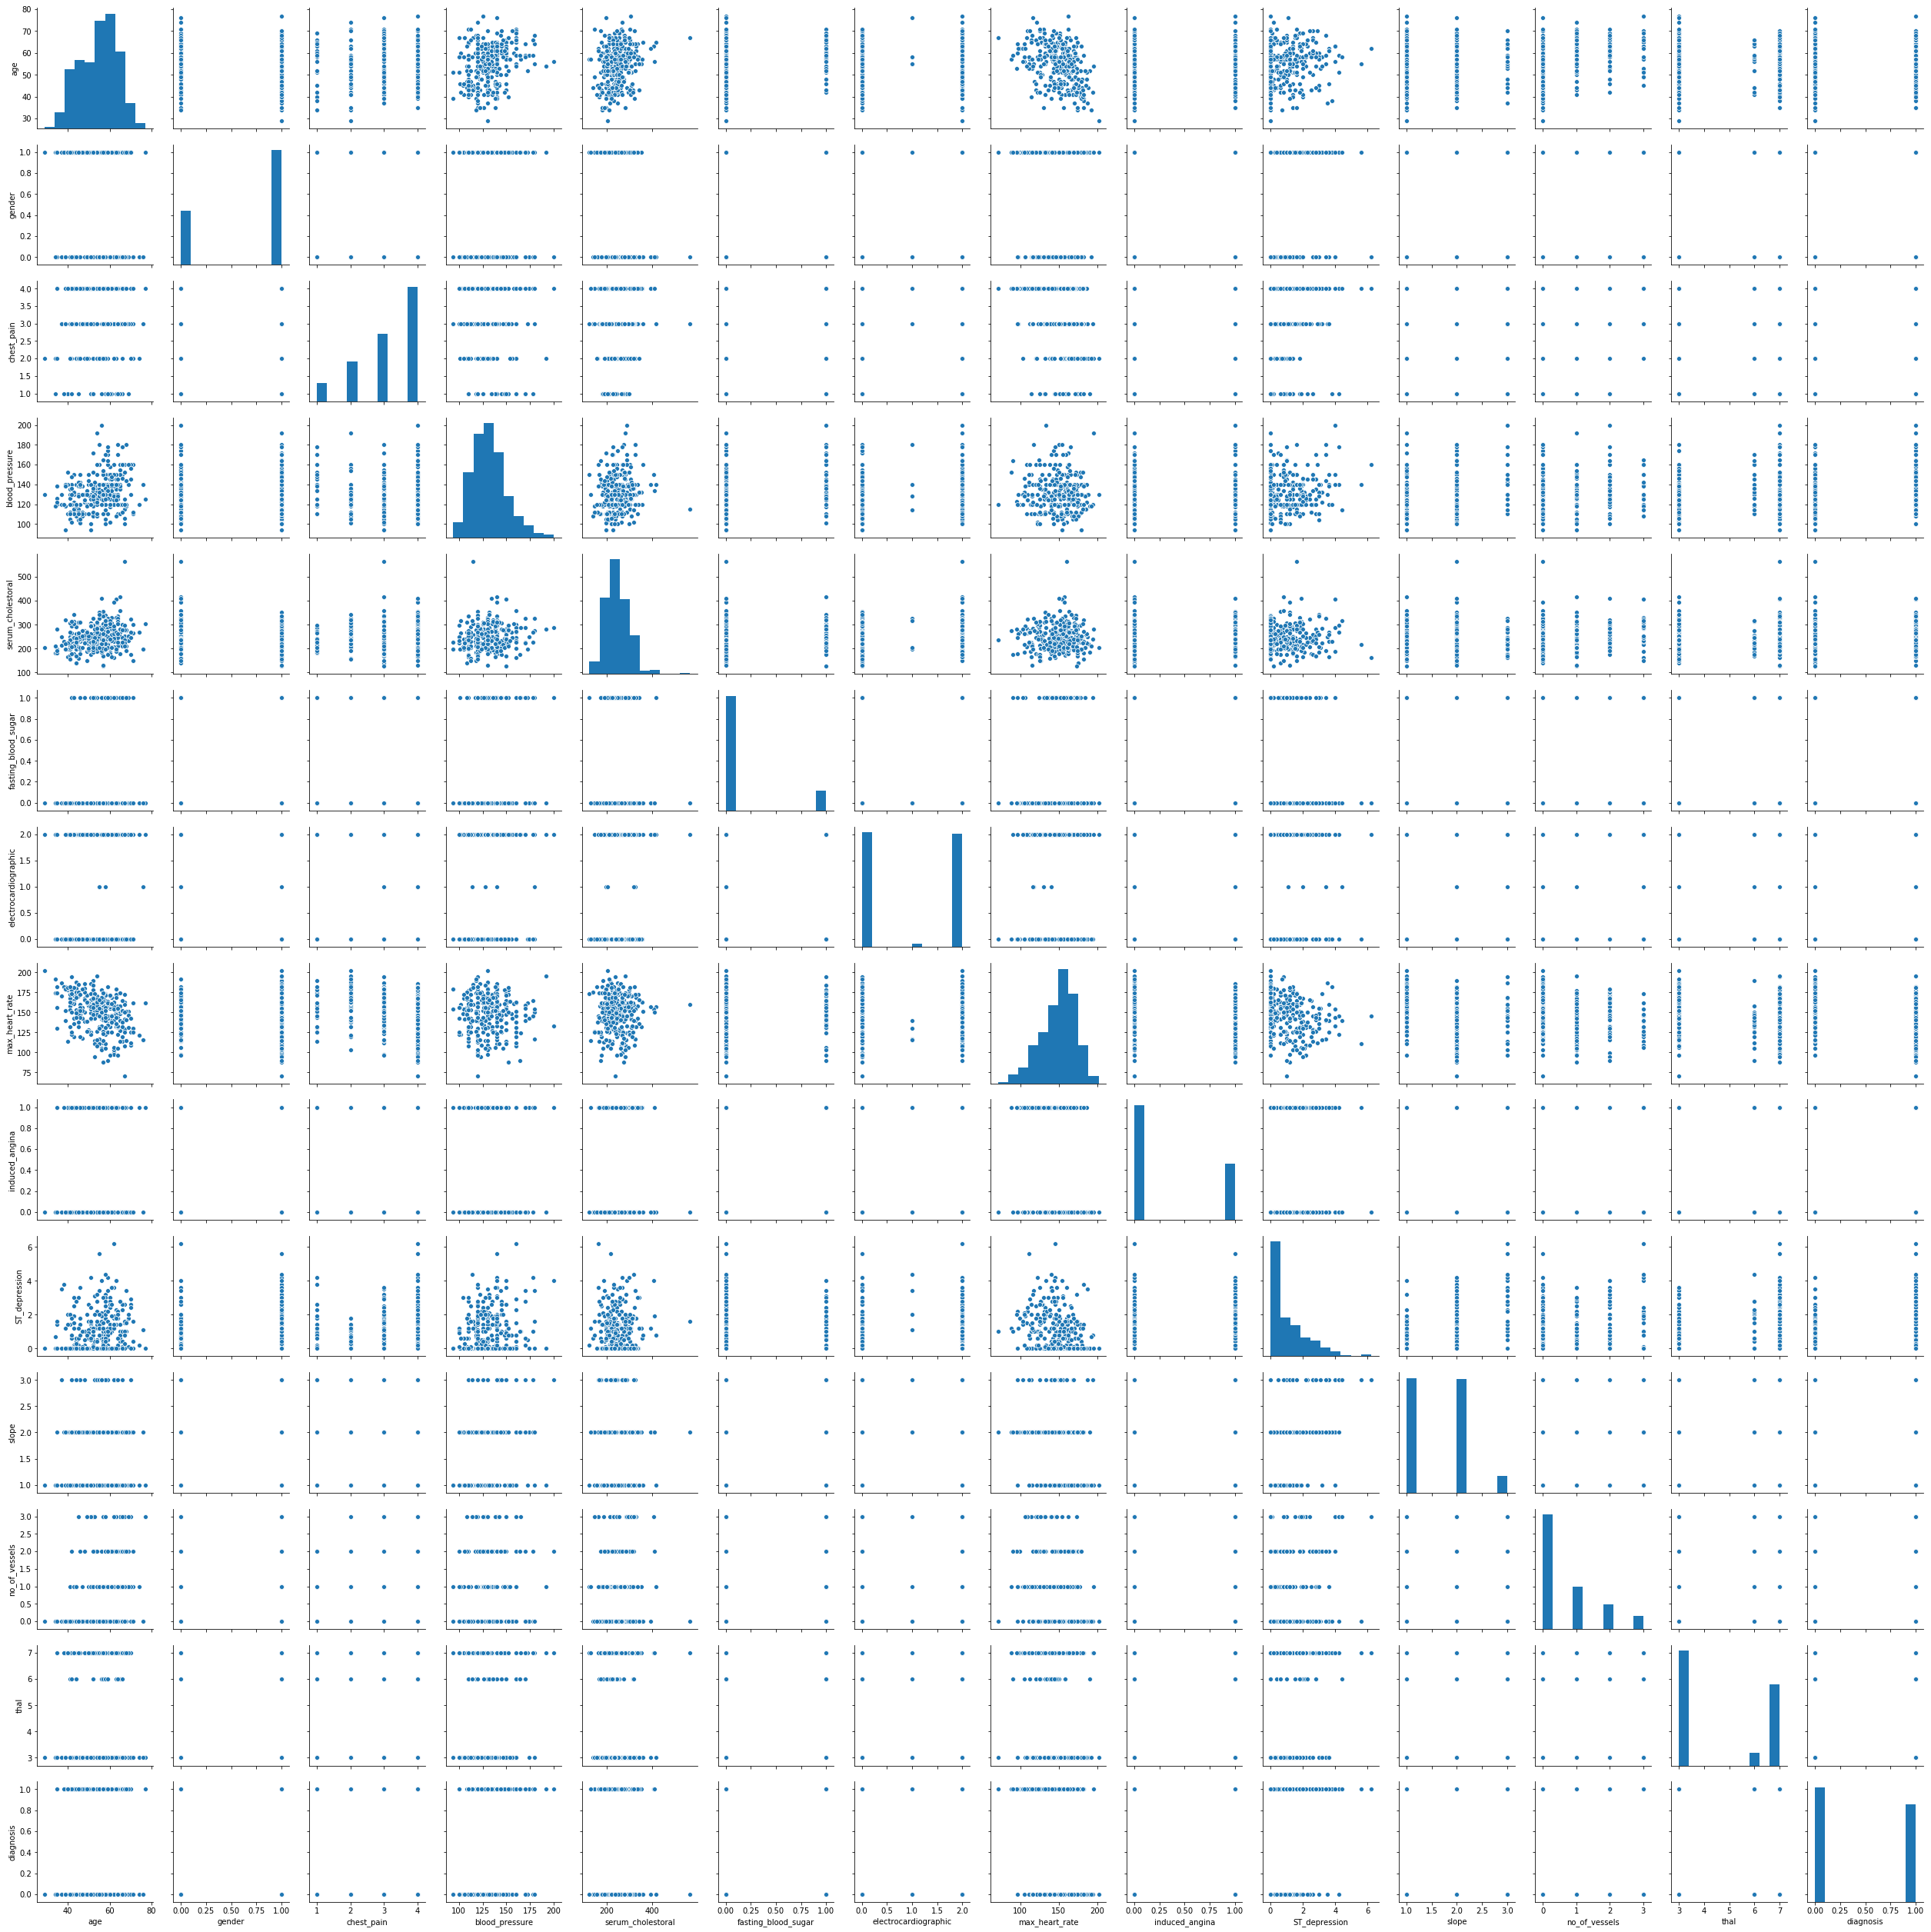

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df[:-1])
plt.show()

### Plot pairwise relationships between the numeric columns of the dataset

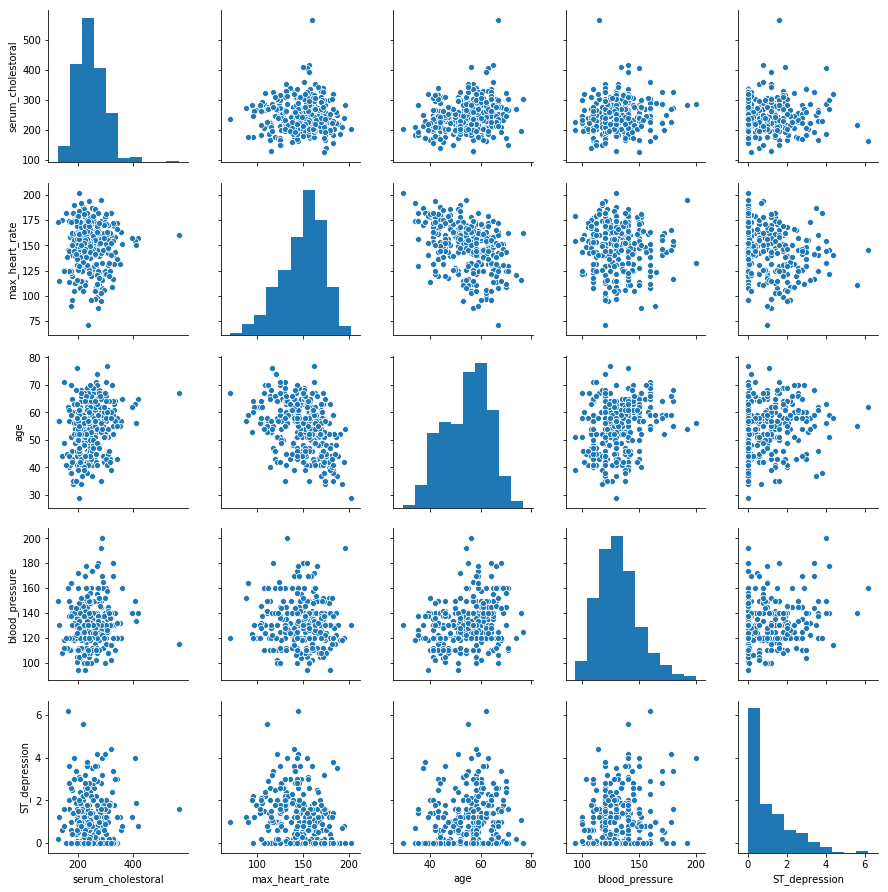

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df[numeric_columns])
plt.show()

### Generate the heatmap to understand the dataset

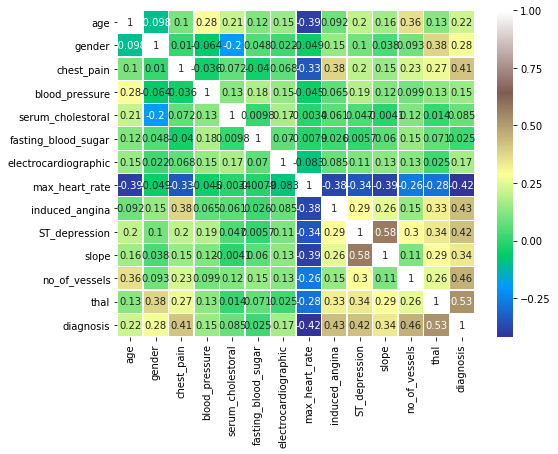

In [13]:
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

#### Group all other columns in the dataset with respect to diagnosis

In [14]:
print ("Minimum age to Maximum age per disease type")

df.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  df.groupby(["diagnosis", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


diagnosis
0    29.0, 76.0
1    35.0, 77.0
Name: age, dtype: object

In [15]:
print ("Mean age per disease type")
df.groupby(["diagnosis", ])["age"].mean()

Mean age per disease type


diagnosis
0    52.585366
1    56.625899
Name: age, dtype: float64

In [16]:
print ("Count each gender per heart disease ")
df.groupby(["diagnosis", "gender"])["age"].count()

Count each gender per heart disease 


diagnosis  gender
0          0.0        72
           1.0        92
1          0.0        25
           1.0       114
Name: age, dtype: int64

In [17]:
print ("Count each chest pain value per heart disease type")
df.groupby(["diagnosis", "chest_pain"])["age"].count()

Count each chest pain value per heart disease type


diagnosis  chest_pain
0          1.0            16
           2.0            41
           3.0            68
           4.0            39
1          1.0             7
           2.0             9
           3.0            18
           4.0           105
Name: age, dtype: int64

In [18]:
print ("Minimum blood pressure to Maximum  blood pressure per disease type")

df.groupby(["diagnosis"])["blood_pressure"].min().astype(str) + ', ' + df.groupby(["diagnosis"])["blood_pressure"].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


diagnosis
0     94.0, 180.0
1    100.0, 200.0
Name: blood_pressure, dtype: object

In [19]:
print ("Mean blood pressure per disease type")
df.groupby(["diagnosis", ])["blood_pressure"].mean()

Mean blood pressure per disease type


diagnosis
0    129.250000
1    134.568345
Name: blood_pressure, dtype: float64

In [20]:
print ("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")

df.groupby(["diagnosis"])["serum_cholestoral"].min().astype(str) + ', ' +  df.groupby(["diagnosis"])["serum_cholestoral"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


diagnosis
0    126.0, 564.0
1    131.0, 409.0
Name: serum_cholestoral, dtype: object

In [21]:
print ("Mean serum_cholestoral per disease type")
df.groupby(["diagnosis", ])["serum_cholestoral"].mean()

Mean serum_cholestoral per disease type


diagnosis
0    242.640244
1    251.474820
Name: serum_cholestoral, dtype: float64

In [22]:
print ("Count each fasting_blood_sugar per heart disease type")
df.groupby(["diagnosis", "fasting_blood_sugar"])["age"].count()

Count each fasting_blood_sugar per heart disease type


diagnosis  fasting_blood_sugar
0          0.0                    141
           1.0                     23
1          0.0                    117
           1.0                     22
Name: age, dtype: int64

In [23]:
print ("Count each electrocardiographic per heart disease type")
df.groupby(["diagnosis", "electrocardiographic"])["age"].count()

Count each electrocardiographic per heart disease type


diagnosis  electrocardiographic
0          0.0                     95
           1.0                      1
           2.0                     68
1          0.0                     56
           1.0                      3
           2.0                     80
Name: age, dtype: int64

In [24]:
print ("Minimum max_heart_rate to Maximum max_heart_rate per disease type")

df.groupby(["diagnosis"])["max_heart_rate"].min().astype(str) + ', ' +  df.groupby(["diagnosis"])["max_heart_rate"].max().astype(str)

Minimum max_heart_rate to Maximum max_heart_rate per disease type


diagnosis
0    96.0, 202.0
1    71.0, 195.0
Name: max_heart_rate, dtype: object

In [25]:
print ("Mean max_heart_rate per disease type")
df.groupby(["diagnosis", ])["max_heart_rate"].mean()

Mean max_heart_rate per disease type


diagnosis
0    158.378049
1    139.258993
Name: max_heart_rate, dtype: float64

In [26]:
print ("Count  induced_angina per heart disease type")
df.groupby(["diagnosis", "induced_angina"])["age"].count()

Count  induced_angina per heart disease type


diagnosis  induced_angina
0          0.0               141
           1.0                23
1          0.0                63
           1.0                76
Name: age, dtype: int64

In [27]:
print ("Count  mean ST_depression per heart disease type")
df.groupby(["diagnosis"])["ST_depression"].mean()

Count  mean ST_depression per heart disease type


diagnosis
0    0.586585
1    1.574101
Name: ST_depression, dtype: float64

In [28]:
df[:12]

,age,gender,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [29]:
print ("Count slope per heart disease type")
df.groupby(["diagnosis", "slope"])["age"].count()

Count slope per heart disease type


diagnosis  slope
0          1.0      106
           2.0       49
           3.0        9
1          1.0       36
           2.0       91
           3.0       12
Name: age, dtype: int64

In [30]:
df[['no_of_vessels','diagnosis']].groupby('no_of_vessels').mean()

,diagnosis
no_of_vessels,
0.0,0.261364
1.0,0.676923
2.0,0.815789
3.0,0.850000


### Generate distribution plot to flexibly plot a univariate distribution of observations.

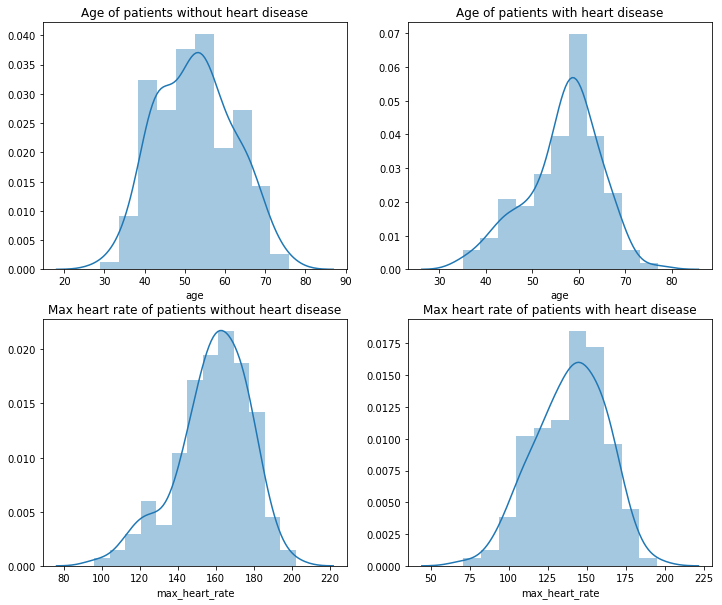

In [31]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['diagnosis']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['diagnosis']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['diagnosis']==0].max_heart_rate)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['diagnosis']==1].max_heart_rate)
plt.title('Max heart rate of patients with heart disease')
plt.show()

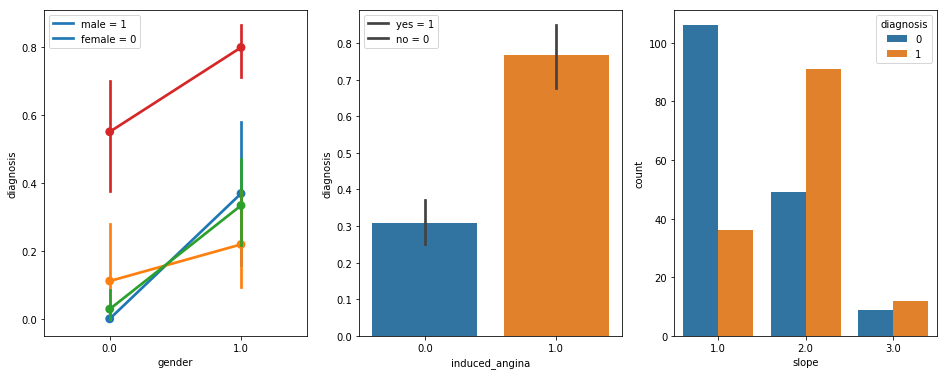

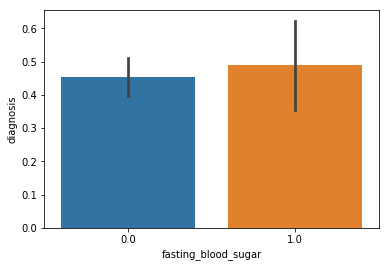

In [32]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="gender", y="diagnosis", hue='chest_pain', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="induced_angina", y="diagnosis", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='diagnosis', data=df)
plt.show()
sns.barplot(x="fasting_blood_sugar", y="diagnosis", data=df)

# 4. Check for null values:

In [33]:
df.isnull().sum()

age                     0
gender                  0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

### Replace the null values in a column with the mode of the column

In [34]:
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [35]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


# 5. Make the train and test splits of the database:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (242, 13)
train_set_y shape: (242,)
test_set_x shape: (61, 13)
test_set_y shape: (61,)


## function to visually represent a confusion matrix

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 6. Model Training: 
# 6.1 MODEL 1 - LogisticRegression
#### Fit the LogisticRegression model to our data

In [38]:
from sklearn.linear_model import LogisticRegression
modellog = LogisticRegression()
# Train the model using the training sets and check score
modellog.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1]
Accuracy is 90.1639344262295


Confusion matrix
[[32  2]
 [ 4 23]]


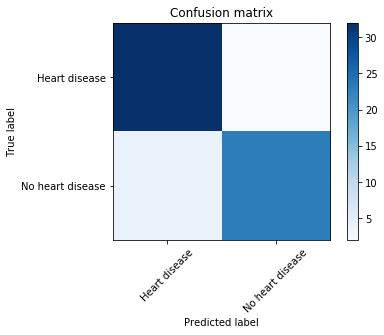

In [39]:
pred1= modellog.predict(X_test)
print(pred1)
acc1=accuracy_score(y_test,pred1)*100
print("Accuracy is",acc1)
print('\n')
cm1=confusion_matrix(y_test,pred1)
#print("confusion matrix is:")
plt.figure()
plot_confusion_matrix(cm1, classes=["Heart disease", "No heart disease"],
                      title='Confusion matrix')
plt.show()
#print(cm1)

In [40]:
file1 = 'modellog_final.sav'
pickle.dump(modellog, open(file1, 'wb'))

### make predictions on new data

In [41]:
age=63
    #continuous
gender = 1
    #categorical, 2 values {0: female, 1: male}
cp = 4
    #(chest pain type): categorical, 4 values{1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
restbp =120
    #(resting blood pressure on admission to hospital): continuous (mmHg)
chol = 229 
    #(serum cholesterol level): continuous (mg/dl)
fbs = 0 
    #(fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
restecg = 2
    #(resting electrocardiography): categorical, 3 values {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
thalach = 129
    #(maximum heart rate achieved): continuous
exang = 1
    #(exercise induced angina): categorical, 2 values {0: no, 1: yes}
oldpeak = 2.6
    #(ST depression induced by exercise relative to rest): continuous
slope = 2
    #(slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping}
ca = 2
    #(number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
thal = 7
    #categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}

xnew=[[age,gender,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
ynew=modellog.predict(xnew)
if(ynew==0):
    print("Output: The person will not get heart disease")
else:
    print("Output: The person will get heart disease")

Output: The person will get heart disease



# 6.2  MODEL 2 - SVM
#### Fit the svm model to our data

In [42]:
from sklearn import svm
#modelsvm = svm.svc()
modelsvm = svm.SVC(kernel='linear', C=1, gamma=1)
modelsvm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1]
Accuracy is 88.52459016393442


Confusion matrix
[[31  3]
 [ 4 23]]


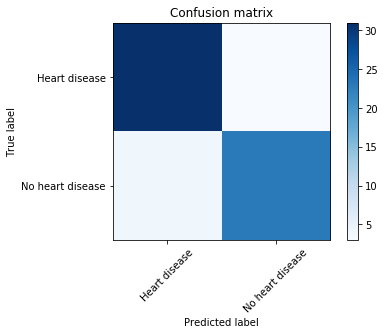

In [43]:
pred2= modelsvm.predict(X_test)
print(pred2)
acc2=accuracy_score(y_test,pred2)*100
print("Accuracy is",acc2)
print('\n')
cm2=confusion_matrix(y_test,pred2)
#print("confusion matrix is:")
plt.figure()
plot_confusion_matrix(cm2, classes=["Heart disease", "No heart disease"],title='Confusion matrix')
plt.show()

In [44]:
file2 = 'modelsvm_final.sav'
pickle.dump(modelsvm, open(file2, 'wb'))

### make predictions on new data

In [45]:
age=63
    #continuous
gender = 1
    #categorical, 2 values {0: female, 1: male}
cp = 4
    #(chest pain type): categorical, 4 values{1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
restbp =120
    #(resting blood pressure on admission to hospital): continuous (mmHg)
chol = 229 
    #(serum cholesterol level): continuous (mg/dl)
fbs = 0 
    #(fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
restecg = 2
    #(resting electrocardiography): categorical, 3 values {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
thalach = 129
    #(maximum heart rate achieved): continuous
exang = 1
    #(exercise induced angina): categorical, 2 values {0: no, 1: yes}
oldpeak = 2.6
    #(ST depression induced by exercise relative to rest): continuous
slope = 2
    #(slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping}
ca = 2
    #(number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
thal = 7
    #categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}

xnew=[[age,gender,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
ynew=modelsvm.predict(xnew)
if(ynew==0):
    print("Output: The person will not get heart disease")
else:
    print("Output: The person will get heart disease")

Output: The person will get heart disease


# 6.3 MODEL 3 - NaiveBayes
#### Fit the NaiveBayes to our data

In [46]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()
modelgnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

[1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1]
Accuracy is 91.80327868852459


Confusion matrix
[[33  1]
 [ 4 23]]


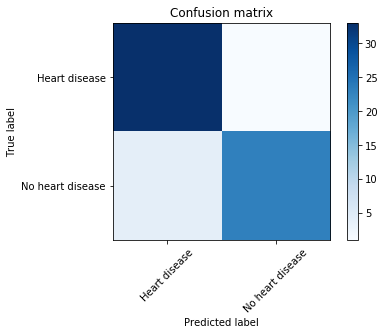

In [47]:
pred3 = modelgnb.predict(X_test)
print(pred3)
acc3=accuracy_score(y_test,pred3)*100
print("Accuracy is",acc3)
print('\n')
cm3=confusion_matrix(y_test,pred3)
plt.figure()
plot_confusion_matrix(cm3, classes=["Heart disease", "No heart disease"],title='Confusion matrix')
plt.show()

In [48]:
file3 = 'modelgnb_final.sav'
pickle.dump(modellog, open(file3, 'wb'))

### make predictions on new data

In [49]:
age=63
    #continuous
gender = 1
    #categorical, 2 values {0: female, 1: male}
cp = 1
    #(chest pain type): categorical, 4 values{1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
restbp =145
    #(resting blood pressure on admission to hospital): continuous (mmHg)
chol = 233
    #(serum cholesterol level): continuous (mg/dl)
fbs = 1
    #(fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
restecg = 2
    #(resting electrocardiography): categorical, 3 values {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
thalach = 150
    #(maximum heart rate achieved): continuous
exang = 0
    #(exercise induced angina): categorical, 2 values {0: no, 1: yes}
oldpeak = 2.3
    #(ST depression induced by exercise relative to rest): continuous
slope = 3
    #(slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping}
ca = 0
    #(number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
thal = 6
    #categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect

xnew=[[age,gender,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
ynew=modelgnb.predict(xnew)
if(ynew==0):
    print("Output: The person will not get heart disease")
else:
    print("Output: The person will not get heart disease")

Output: The person will not get heart disease


# 6.4 MODEL 4 - Decision Tree
#### Fit the DecisionTreeClassifier to our data

In [50]:
clf_entropy=DecisionTreeClassifier(criterion = "entropy", random_state =0,max_depth=5,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Predict the diagnosis values of test data with the help of our model

[0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1]
Accuracy is 81.9672131147541


Confusion matrix
[[32  2]
 [ 9 18]]


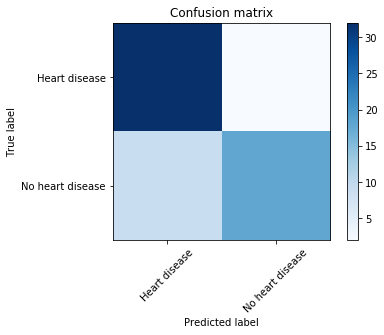

In [51]:
y_pred_en=clf_entropy.predict(X_test)
print(y_pred_en)
acc4=accuracy_score(y_test,y_pred_en)*100
print("Accuracy is",acc4)
print('\n')
cm5=confusion_matrix(y_test,y_pred_en)
#print("confusion matrix is:")
plt.figure()
plot_confusion_matrix(cm5, classes=["Heart disease", "No heart disease"],title='Confusion matrix')
plt.show()

In [52]:
file4 = 'clf_entropy_final.sav'
pickle.dump(clf_entropy, open(file4, 'wb'))

The above confusion matrix shows that our classification model has predicted 17 values incorrectly

### Visualize the tree

In [53]:
def visualize_tree(tr, feature_names):
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(tr, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]

In [54]:
visualize_tree(clf_entropy, df.loc[:,'age':'thal'].columns)

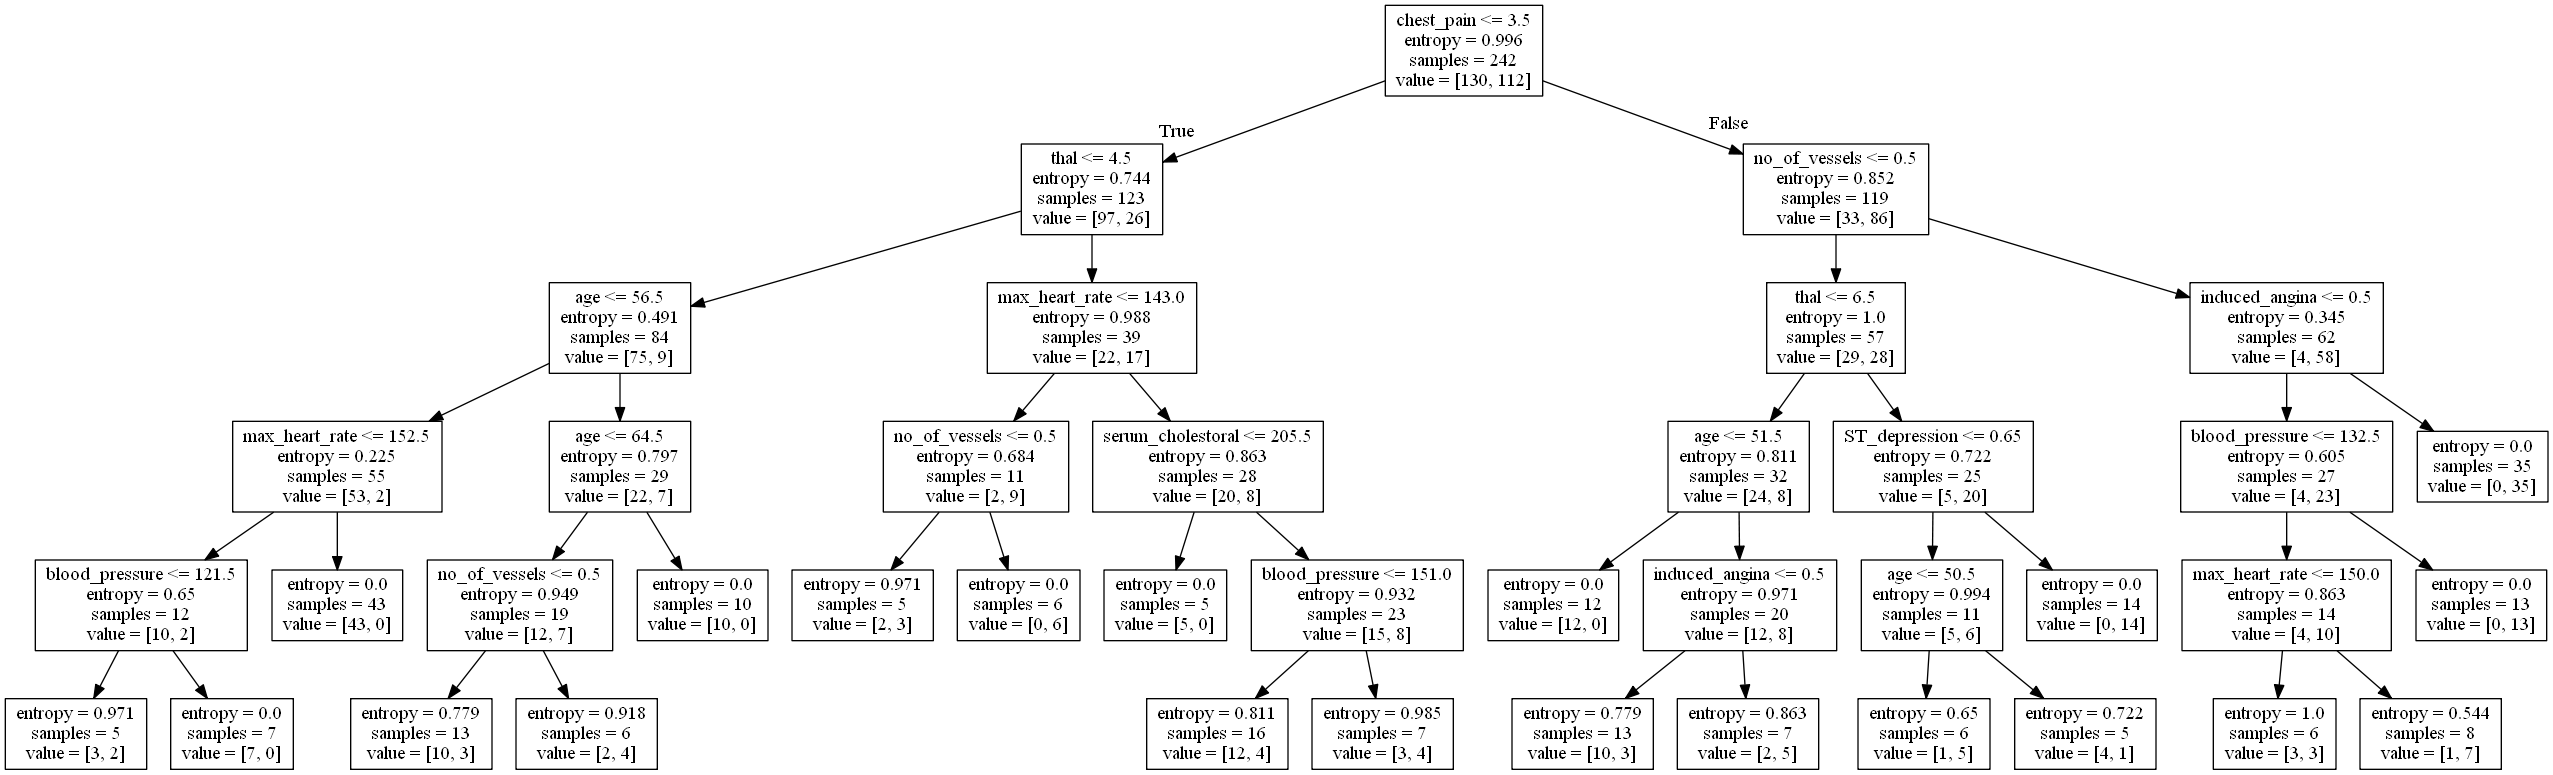

In [55]:
from IPython.display import Image  
import pydotplus 
dot_data = tree.export_graphviz(clf_entropy)
graph = pydotplus.graphviz.graph_from_dot_file("dt.dot")
graph.write_pdf("dt.pdf")
Image(graph.create_png())

In [56]:
w = clf_entropy.feature_importances_

prob_df = pd.DataFrame(columns = ['X_k', 'P(X_k)'])
for c in range(len(df.loc[:,'age':'thal'].columns)):
    prob_df.loc[len(prob_df)] = [df.loc[:,'age':'thal'].columns[c], w[c]]
    
prob_df

,X_k,P(X_k)
0,age,0.128549
1,gender,0.000000
2,chest_pain,0.297622
3,blood_pressure,0.054171
4,serum_cholestoral,0.016868
5,fasting_blood_sugar,0.000000
6,electrocardiographic,0.000000
7,max_heart_rate,0.081437
8,induced_angina,0.051324
9,ST_depression,0.043974


In [57]:
print ("Sum of dependent probabilities = " , prob_df["P(X_k)"].sum())

Sum of dependent probabilities =  1.0


#### Make Predictions on new data
#### Predicting new values with our model

In [58]:
age=63
    #continuous
gender = 1
    #categorical, 2 values {0: female, 1: male}
cp = 4
    #(chest pain type): categorical, 4 values{1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
restbp =120
    #(resting blood pressure on admission to hospital): continuous (mmHg)
chol = 229 
    #(serum cholesterol level): continuous (mg/dl)
fbs = 0 
    #(fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
restecg = 2
    #(resting electrocardiography): categorical, 3 values {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
thalach = 129
    #(maximum heart rate achieved): continuous
exang = 1
    #(exercise induced angina): categorical, 2 values {0: no, 1: yes}
oldpeak = 2.6
    #(ST depression induced by exercise relative to rest): continuous
slope = 2
    #(slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping}
ca = 2
    #(number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
thal = 7
    #categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}

xnew=[[age,gender,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
ynew=clf_entropy.predict(xnew)

##### ynew=1 indicates that the person may get heart disease
##### ynew=0 indicates that the person will not get heart disease

In [59]:
if(ynew==0):
    print("Output: The person will not get heart disease")
else:
    print("Output: The person will get heart disease")    

Output: The person will get heart disease


# 6.5 MODEL 5 - Random Forest Classifier
### Fit the data with Random Forest classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV 
clf = RandomForestClassifier()
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8],
              'n_estimators':[110], 'random_state':[2606]
             }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=None,
            oob_score=False, random_state=2606, verbose=0,
            warm_start=False)

#### Check the accuracy of the model and build the confusion matrix

Accuracy is: 88.52459016393442


Confusion matrix
[[32  2]
 [ 5 22]]


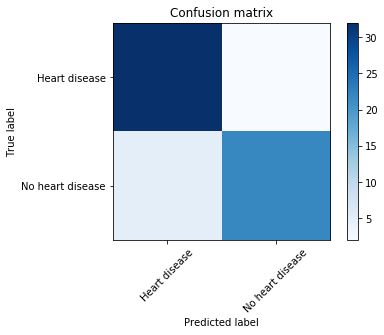

In [61]:
predictions = clf.predict(X_test)
acc5=accuracy_score(y_test, predictions)*100
print("Accuracy is:",acc5)
print('\n')
cm=confusion_matrix(y_test,predictions)
plt.figure()
plot_confusion_matrix(cm, classes=["Heart disease", "No heart disease"],title='Confusion matrix')
plt.show()

#print(cm)

In [62]:
file5 = 'clf_final.sav'
pickle.dump(clf, open(file5, 'wb'))

#### Predict new data with random forest classifier model

In [63]:
age=63
    #continuous
gender = 1
    #categorical, 2 values {0: female, 1: male}
cp = 1
    #(chest pain type): categorical, 4 values{1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
restbp =145
    #(resting blood pressure on admission to hospital): continuous (mmHg)
chol = 233
    #(serum cholesterol level): continuous (mg/dl)
fbs = 1
    #(fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
restecg = 2
     #(resting electrocardiography): categorical, 3 values {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
thalach = 150
    #(maximum heart rate achieved): continuous
exang = 0
    #(exercise induced angina): categorical, 2 values {0: no, 1: yes}
oldpeak = 2.3
    #(ST depression induced by exercise relative to rest): continuous
slope = 3
    #(slope of peak exercise ST segment): categorical, 3 values {1: upsloping, 2: flat, 3: downsloping}
ca = 0
    #(number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
thal = 6
    #categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}

xnew=[[age,gender,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
ynew=clf.predict(xnew)

In [64]:
if(ynew==0):
    print("Output: The person will not get heart disease")
else:
    print("Output: The person will get heart disease")

Output: The person will not get heart disease


# 7. Represent the accuracies of models as a bar-chart

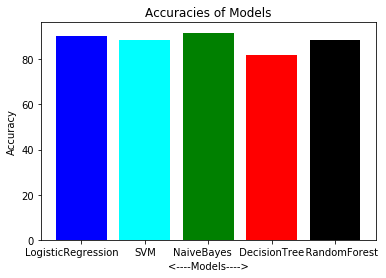

                      accuracy
Logistic Regression  90.163934
SVM                  88.524590
Naive Bayes          91.803279
Decision Trees       81.967213
Random Forests       88.524590
  
Of all the models NaiveBayes Classifier gives highest accuracy


In [65]:
accuracies={"LogisticRegression      ":acc1,"SVM":acc2,"NaiveBayes    ":acc3," DecisionTree ":acc4,"    RandomForest":acc5}
plt.bar(list(accuracies.keys()),accuracies.values(),color=['blue','cyan','green','red','black'])
plt.title('Accuracies of Models')
plt.xlabel('<----Models---->')
plt.ylabel('Accuracy')
plt.show()
accuracy = [acc1,acc2,acc3,acc4,acc5]
classifiers = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Trees', 'Random Forests']
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
print(summary)
print("  ")
print("Of all the models NaiveBayes Classifier gives highest accuracy")
